In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from xgboost import XGBClassifier
import joblib


In [13]:
df=pd.read_csv('adult.csv')
print(df)



       age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   

In [14]:
missing_value=df.isnull().sum()                        #missing value count
print(missing_value[missing_value >0])

Series([], dtype: int64)


In [81]:
                                                                      #Outliers Detection
def detect_outliers_zscore(df,threshold=3):
    outliers={}
    for column in df.select_dtypes(include=[float,int]).columns:
        z_scores=stats.zscore(df[column])
        outliers[column]=df[(z_scores >threshold) | (z_scores < -threshold)]
        [column]
        return outliers
outliers_zscore=detect_outliers_zscore(df)
print(outliers_zscore)    

    


{'age':        age  fnlwgt  education.num    sex  capital.gain  capital.loss  \
0       90   77053              9   True             0          4356   
1       82  132870              9   True             0          4356   
118     83  153183             13  False             0          2392   
128     81  177408              9  False             0          2377   
199     90   51744              9  False             0          2206   
...    ...     ...            ...    ...           ...           ...   
31939   82   71438              9  False             0             0   
32305   90  313749              9   True             0             0   
32468   85   98611             13  False             0             0   
32500   82  403910              9  False             0             0   
32528   81  120478             11   True             0             0   

       hours.per.week  income  
0                  40    True  
1                  18    True  
118                55   False  

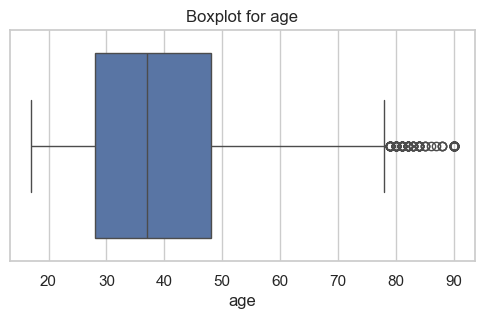

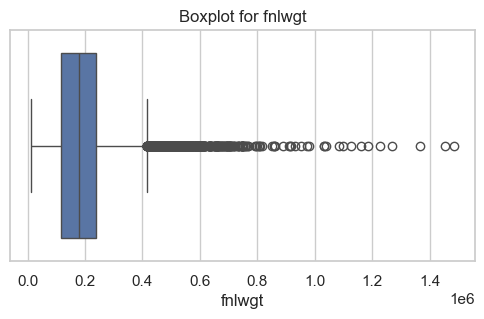

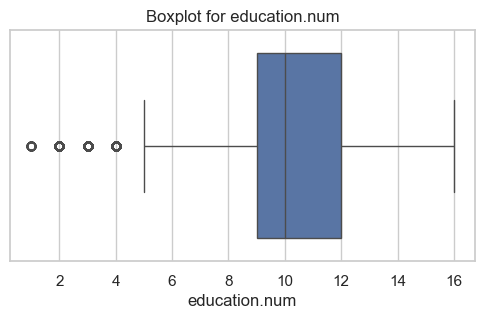

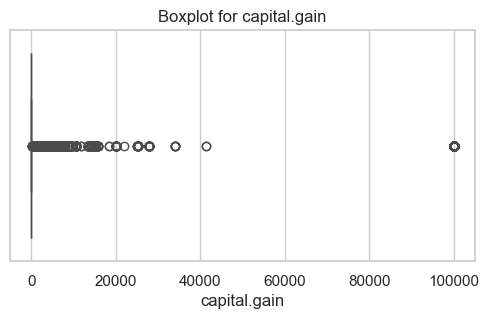

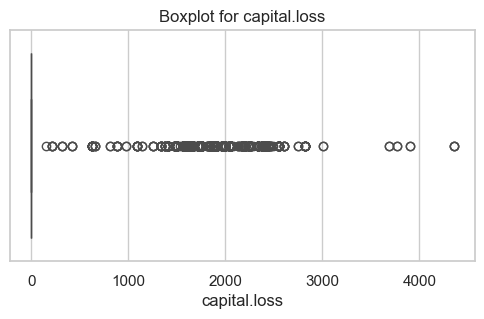

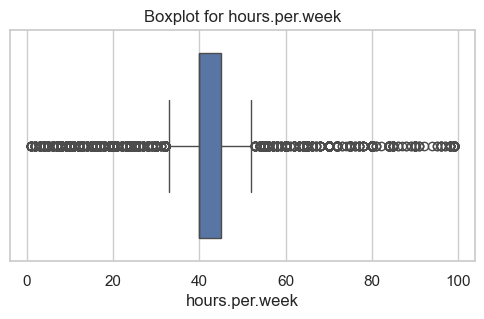

In [86]:
# visualize outliers
def plot_boxplots(df):
    numeric_columns=df.select_dtypes(include=[float,int]).columns
    for column in numeric_columns:
        plt.figure(figsize=(6,3))
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot for {column}')
        plt.show()
plot_boxplots(df)        

In [16]:
sns.set(style="whitegrid")                             #data visualization


In [48]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [6]:
df.info() 
df.describe()
df.dropna(inplace=True)
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


(32561, 15)

In [ ]:
smote=SMOTE(random_state=42)
x_balanced,y_balanced=smote.fit_resample(x,y)

In [55]:
df=df[(df !='?').all(axis=1)]
df['income']=df['income'].map({'<50K': 0,'>50K': 1})

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


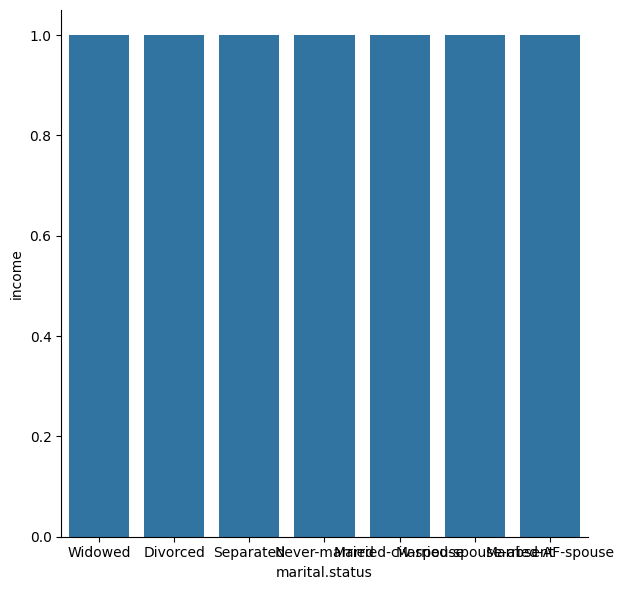

In [66]:
sns.catplot(x='marital.status',y='income',data=df ,kind='bar',height=6)     # shows the relation between categorical varible and numerical
plt.show()

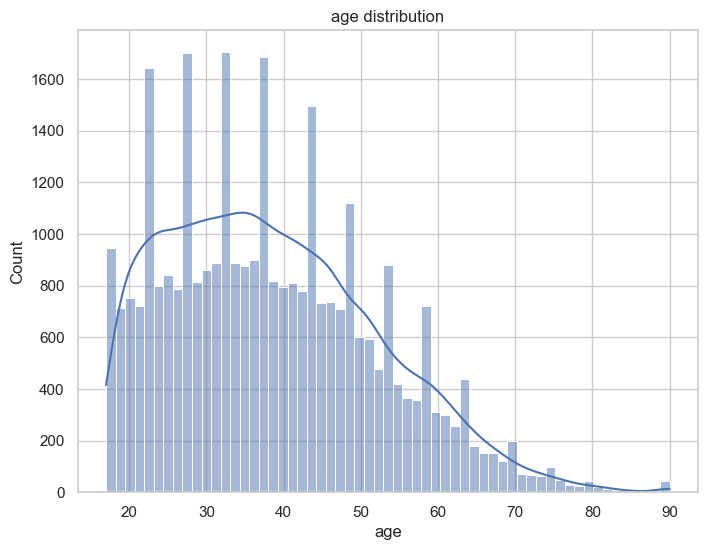

In [19]:
plt.figure(figsize=(8,6))                                  #exploring numerical features,age distribution by use of histplot
sns.histplot(df['age'],kde=True)
plt.title('age distribution')
plt.show()

In [27]:
non_numeric_cols=df.columns[df.dtypes==object]                    #one hot encoding
for col in non_numeric_cols:
    if col=='target':
        continue
    elif len(df[col].unique())<=2:
        df[col]=pd.get_dummies(df[col]).values
    else:
        df.drop(columns=[col],inplace=True)    
    




In [33]:
                                                                   #correlation
corr_matrix=df.select_dtypes(include=[np.number]).corr()
print(corr_matrix.shape)
corr_matrix.T

(6, 6)


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [ ]:
numeric_df=df.select_dtypes(include=[float,int])
numeric_df=numeric_df.dropna()
corr_matrix=numeric_df.corr() 

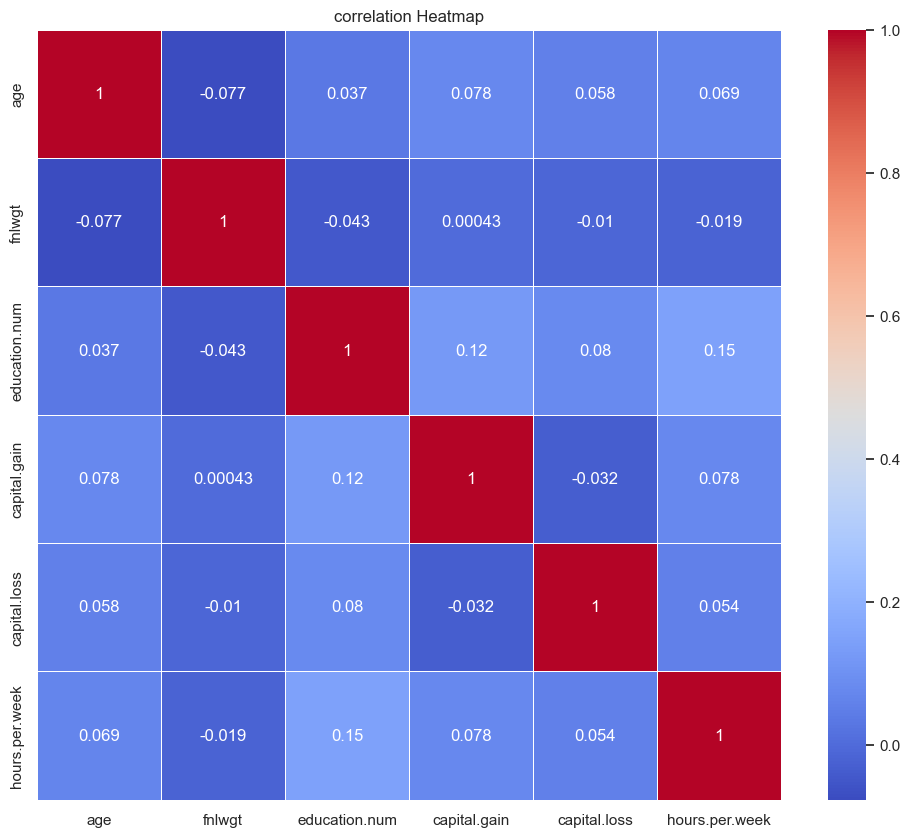

In [93]:
import seaborn as sns                                             # correlation heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('correlation Heatmap')
plt.show()

In [91]:
                                      #Concatenation
import numpy as np
array1=np.random.rand(2,32561)
array2=np.random.rand(1,32561)
if array1.shape[1]==array2.shape[1]:
    result=np.vstack((array1,array2))
    print(result.shape)
else:
    print("shapes are not compatible for concatentation")    

(3, 32561)


In [77]:
import numpy as np                  # shapes are compatible to assignment
array1=np.random.rand(2,32561)
array2=np.random.rand(1,32561)
if array1.shape==array2.shape:
    array1[:]=array2
else:
    print("shapes are not compatible for assignment.")    







    

shapes are not compatible for assignment.


In [10]:
df.shape

(32561, 15)

In [11]:
df2=pd.get_dummies(df,drop_first=True) 

In [17]:
x=df.drop(columns=['income'])
y=df['income']

In [18]:
label_encoder=LabelEncoder()                               #Label encoder
y=label_encoder.fit_transform(y)

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)

In [35]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [7]:
numeric_features=['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week']
numeric_transformer= Pipeline(steps=[('scaler',StandardScaler())])

categorical_features=['workclass','education','marital.status','occupation','relationship','race','sex','native.country']
categorical_transformers=Pipeline(steps=[('onehot',OneHotEncoder(handle_unknown='ignore'))])
preprocessor=ColumnTransformer(transformers=[('num',numeric_transformer,numeric_features),('cat',categorical_transformers,categorical_features)])
x=preprocessor.fit_transform(x)

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y)
x_train,x_test,y_train,_y_test-train_test_split(x)

In [59]:
rf=RandomForestClassifier(n_estimators=120,random_state=40)

In [11]:
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [12]:
y_pred=rf.predict(x_test)

In [60]:
accuracy=accuracy_score(y_test,y_pred)
print(f'Test Accuracy:{accuracy:2f}')
print('Classification Report:')
print(classification_report(y_test,y_pred))

Test Accuracy:0.849071
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4976
           1       0.71      0.61      0.66      1537

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.78      6513
weighted avg       0.84      0.85      0.84      6513



In [73]:
#feature selection
x_train_dense=x_train.toarray()
x_test_dense=x_test.toarray()
x_train_df=pd.DataFrame(x_train_dense)
x_test_df=pd.DataFrame(x_test_dense)
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)
importances=rf.feature_importances_
indices=np.argsort(importances)[-10:]
x_train_top=x_train[:,indices]
x_test_top=x_test[:,indices]
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train_top,y_train)
y_pred=rf.predict(x_test_top)
print("Accuracy with top features:",accuracy_score(y_test,y_pred))


Accuracy with top features: 0.8452326116996776


In [72]:
# Feature engineering
poly=PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train_poly,y_train)
y_pred=rf.predict(x_test_poly)
print("Accuracy with polynomial features:",accuracy_score(y_test,y_pred))


Accuracy with polynomial features: 0.8502994011976048


In [66]:
# Hyperparameter tuning
param_grid={'n_estimators':[100,200,300],'max_depth':[10,20,30,None],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4],'max_features':['auto','sqrt','log2']}
rf=RandomForestClassifier(random_state=42)
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)
print("Best Parameters:",grid_search.best_params_)
best_rf=grid_search.best_estimator_
y_pred=best_rf.predict(x_test)
print("Accuracy after tuning:",accuracy_score(y_test,y_pred))


Fitting 3 folds for each of 324 candidates, totalling 972 fits


c:\Users\s3415\Downloads\censu_ income_prediction\env310\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
324 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
201 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\s3415\Downloads\censu_ income_prediction\env310\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\s3415\Downloads\censu_ income_prediction\env310\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\s3415\Downloads\censu_ income_prediction\env310\lib\site-packages\skle

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy after tuning: 0.8627360663288807
